In [ ]:
#@title
# Run the next cell to install a virtual display in Google Colab
%%capture
!apt install libgl1-mesa-glx xvfb

# Run this cell if your working with Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#@title
from google.colab import output
output.enable_custom_widget_manager()

# Inductiva API Demo

**Inductiva API** is here to democratize simulations at a large scale.

In this notebook, we introduce a virtual **Wind Tunnel scenario** where vehicles are subjected to intense air flows under different conditions to access their aerodynamic performance. Virtual and physical wind tunnels are widely used by the automotive and aeronautic industry to develop and improve the ride experience of their vehicles.

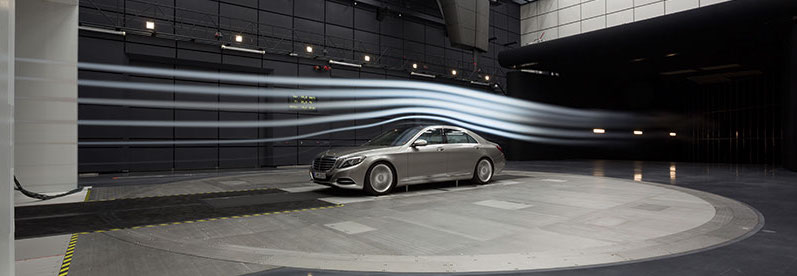

# Install Inductiva

Before running any scenario, we need to install the **Inductiva** package. This allows to configure and manage simulations, but does not install the heavy and cumbersome simulators on the user side. If running locally, this step is just performed once.

**Run the following block to install:**

In [ ]:
%%capture
!pip install inductiva

## User Setup

With everything installed, we can import **inductiva** package and log in with our unique **API KEY**.

In [ ]:
import inductiva

inductiva.api_key = "b7177b3febd6784807c0eed2f38df9ac327eec729e91232087963fa7cf6a7baa"

To simplify the workflow, users can define at the start the folder to work on. This folder contains possible configuration files, object files and will receive all of the output files.

In [ ]:
inductiva.working_dir = "/content/gdrive/Shareddrives/API_Tutorials/Inductiva_API_Demos/notebooks/wind_tunnel/"

## Wind Tunnel Scenario


Our **virtual wind tunnel** is a *box shaped* region where an air flow is set from a certain direction. The goal is to test the aerodynamic performance
 of a *vehicle* we set inside under these conditions.

The workflow is as follows:
1. Establish the input variables that configure the Wind Tunnel: **domain geometry** and **velocity of the air flow**.
2. Define the **vehicle/object** to be set inside the Wind Tunnel.
3. Configure the simulation parameters and parallelization strategy: **time**, **resolution**, **number of CPU cores**, etc...
4. **Run the simulation**.
5. Visualize the results and analyze aerodynamics data.

The final step allows users to access the performance of the vehicle with **Inductiva API**. No other tool is required to do so!


### 1. Configuring the Wind Tunnel


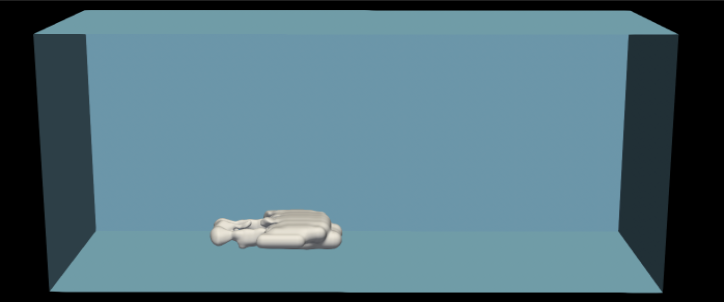

The user can define at the start:
- Domain geometry representing the wind tunnel (See fig. above);
- Flow velocity of the air.

In [6]:
# Set the different dimensions of the box domain
domain = {"x": [-5, 15], "y": [-5, 5], "z": [-1, 8]}

# Set the air flow direction and magnitude
flow_velocity = [30, 0, 0] # m/s -> 108 Km/h

In [7]:
# Initialize the Wind Tunnel configuration
scenario = inductiva.fluids.WindTunnel(flow_velocity=flow_velocity,
                                       domain=domain)

In [ ]:
inductiva.admin.launch_executer(name="windtunnel",
                                machine_type="c2d-standard-112",
                                executer_type="openfoam")

### 2. Define the object

The object to be set inside the wind tunnel is provided by the user. This object is loaded from the user local machine and here we identify with it's relative path.

Since we are working on Google Colab, we have use `inductiva.working_dir` to reference the drive folder where our objects are and here we just need to select its name:

We have yet to start a simulation. Before doing so, users define parameters that configure the simulation like ***simulation time*** and ***resolution*** and decide which ***object*** to set inside the wind tunnel.

In [9]:
object_path = "motorbike.obj"

### 3. Configure the simulation:

This step can be done at once when running the simulation, but we want to  highlight the parameters that configure the simulation which allow users to have a refined control.

In particular, users can configure:
- the **simulation time** that corresponds to time scale we want the object to be subject;
- the **resolution** of the object in the wind tunnel, that determines the accuracy of the simulation. Higher resolutions imply a more time expensive simulation.
- the **parallelization strategy** that here is determined by the number of **CPU cores** where the simulation will run.

In [10]:
simulation_time = 50
resolution = "medium"
n_cores = 56

### 4. Run the simulation

After preparing everything, running the simulation is super easy!

In [11]:
output = scenario.simulate(object_path=object_path,
                           simulation_time=simulation_time,
                           resolution=resolution,
                           n_cores=n_cores)

INFO:absl:This simulation has the task_id: 1689756863048844809
INFO:absl:Uploading input files...
INFO:absl:Request submitted.
INFO:absl:Waiting for resources...
INFO:absl:An executer has picked up the request
INFO:absl:The requested task is being executed remotely
INFO:absl:Task executed successfuly.
INFO:absl:Downloading output...
INFO:absl:Output downloaded.
INFO:absl:Extracting output ZIP file to "/content/gdrive/Shareddrives/API_Tutorials/Inductiva_API_Demos/notebooks/wind_tunnel/wind-tunnel-output-2023-07-19T08h54m21s"...
INFO:absl:Output extracted.


### 5. Visuals and Analysis

Engineers perform a qualitative and a quantitative analysis. The first is done through visuals and the latter with analysis of aerodynamic measurements.

**Inductiva API** allows users to do both!


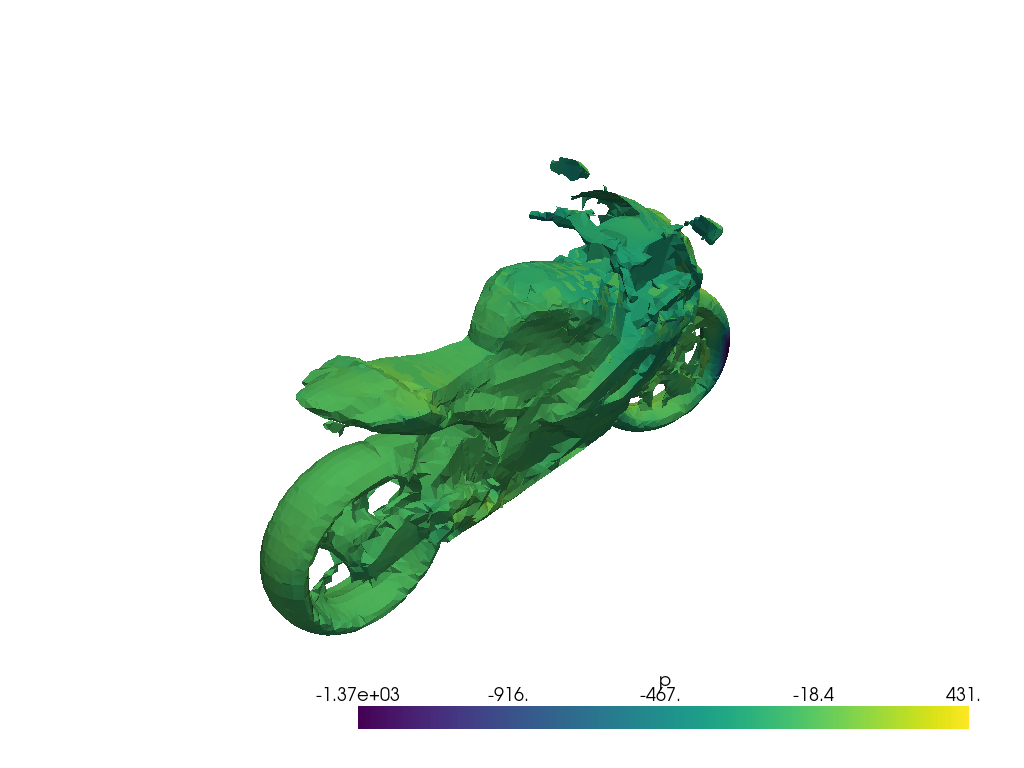

In [12]:
pressure_field = output.get_physical_field("pressure")
pressure_field.render(save_path="pressure.png",
                      background_color="white")


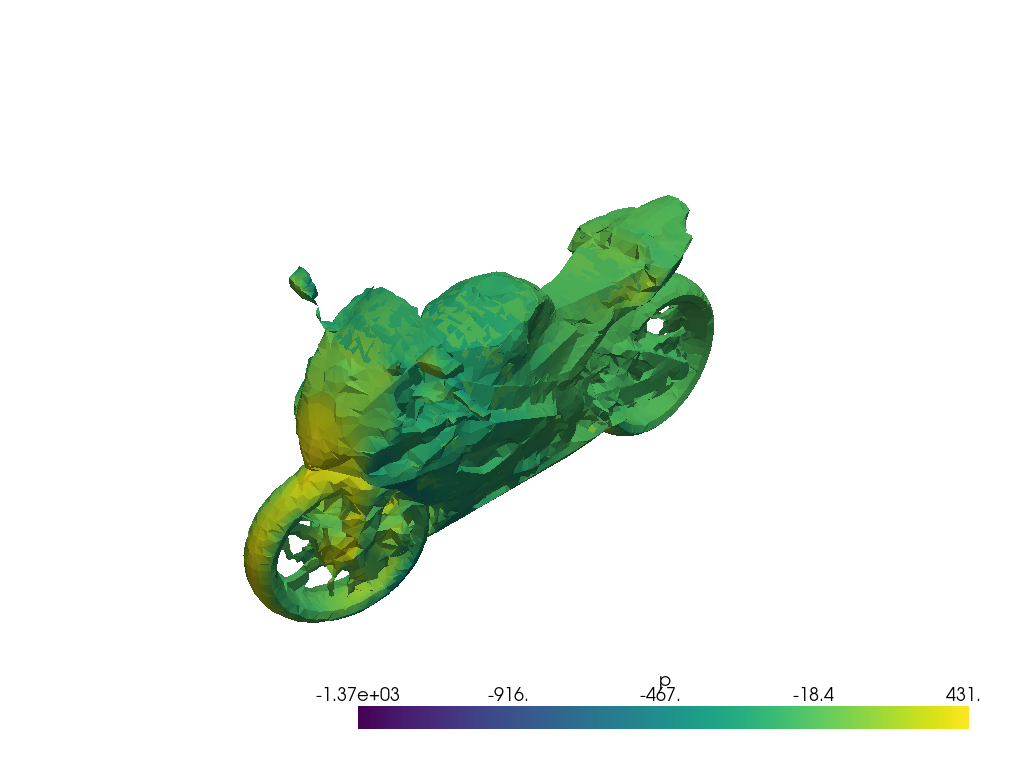

In [13]:
pressure_field.mesh = pressure_field.mesh.rotate_z(180)
pressure_field.render(save_path="pressure.png",
                      background_color="white")


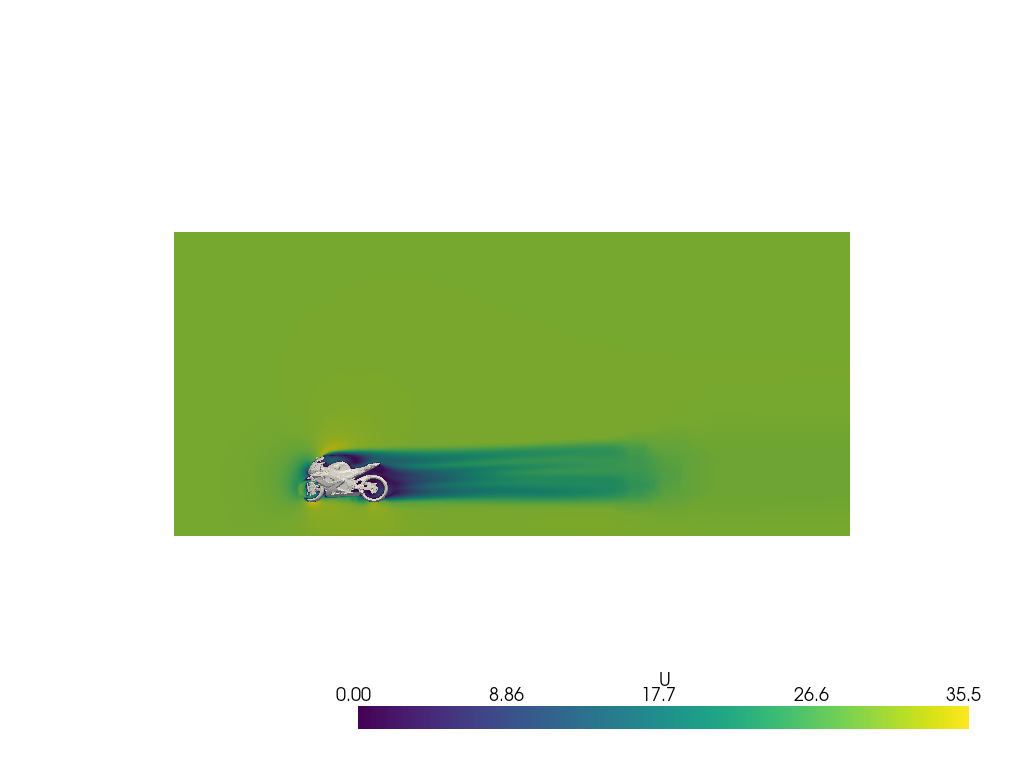

In [14]:
cutting_plane = output.get_flow_plane("velocity")
output.render_flow(cutting_plane, "velocity",
                   background_color="white",
                   save_path="cutting_plane.png")